# Normal Distribution, Sampling & Confidence
#####    Practical assignment 2

This practical assignment need to be handed in on Brightspace before the deadline, 23:59 24/04/2020. Even though you are working in pairs, each student has to hand in their own assignment. Make sure that every cell is executed/compiled and renamed to 

**Assignment2_Surname1_Surname2.ipynb**

before submitting. For questions contact your TA during the workgroup, or via mail. You will get either a pass or fail for this assignment, depending on whether all questions are sufficiently answered (i.e. if enough effort has been put into this assignment)

**Name 1:** Erik Frohn - s1034685

**Name 2:** Evie de Leeuw - s1037585

### Dataset

Breakout is a fun game to play, where you control a small paddle that can move sideways on the bottom of the screen, where the goal is to bounce a ball back upwards against placed bricks. Each brick that is broken awards the player with some points. When all bricks are cleared, the player advances to the next level. Whenever the ball is not bounced back the player loses 1 life and can try again in the same level. When all lives are lost, the game is over.

Two friends play this game simultaneously, and define winning as having a higher score than the other person. All the games these two friends ever played together are collected in this dataset. 

Let's start by loading the toolboxes we need and uploading the dataset. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_style("whitegrid")

from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Breakout.csv to Breakout (1).csv


In [0]:
breakout_score = pd.read_csv("Breakout.csv")
breakout_score.keys()

Index(['score_1', 'wins_1', 'score_2', 'wins_2'], dtype='object')

In this workgroup, we will focus only on the scores of player 1. Which you can find in the variable score_1. Each row represents the score of one game. 

### <span style="color:red"> Question 1 </span>
How often did this player play the game?

In [0]:
player1 = breakout_score['score_1']
player1.shape[0]


1000

### Normal distribution

Before we are going to analyze the data, it is important to see how the data is distributed, or more importantly, if it is normally distributed or not.

### <span style="color:red"> Question 2 </span>
Plot the distributions of the scores of this player, and describe the distribution. Do you think the data are normally distributed? (hint: use a distplot)

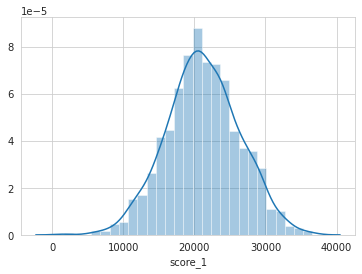

In [0]:
sns.distplot(player1)


Yes it does look like the data is normally distributed


### Normal probability

Once we decide that a variable is approximately normal, we can use our knowledge about the normat distribution to answer all sorts of questions about that variable related to probability. Take, for example, the question of, "What is the probability that this player scores 20000 or lower in a particular game?"

To answer this question, we compute the z-score, which tells us something about how far a datapoint is from the mean. Then we use a z-table to convert this z-score to a probability. 

In Python, this is done in one step with the function stats.norm.cdf().

In [0]:
mean = breakout_score['score_1'].mean()
std = breakout_score['score_1'].std()
score = 20000

norm.cdf(score, mean, std)

0.4075083828254088

This means that this player has a probability of 0.334 of having a score lower than 20000. 

We can compare that probability to the empirical probability. We simply need to determine how many observations fall below 20000 then divide this number by the total sample size. 

In [0]:
sum(breakout_score['score_1'] < score) / len(breakout_score)

0.4


Although the probabilities are not exactly the same, they are reasonably close. The closer that your distribution is to being normal, the more accurate the theoretical probabilities will be.

### <span style="color:red"> Question 3 </span>

The average score of all players online is 21500. What is the probability that in a particular game, this player scores higher than this online average? Use the normal approximation to compute this probability.

In [0]:
mean = breakout_score['score_1'].mean()
std = breakout_score['score_1'].std()
score = 21500

1-norm.cdf(score, mean, std)

0.476756853820102

### Sampling

In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

We can use the following command to sample 30 observations from the population:

In [0]:
samp = breakout_score['score_1'].sample(30)

### <span style="color:red"> Question 4.1 </span>
Have a look at the distribution of the sampled data by making another distplot. Describe how it differs from the population distribution. And how does that change when you draw a larger sample of 100 scores?



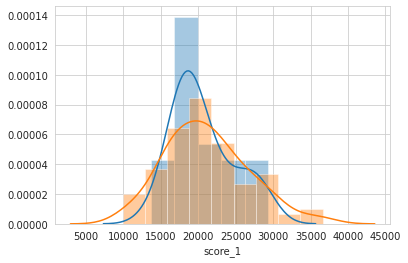

In [0]:
sns.distplot(samp)
samp2 = breakout_score['score_1'].sample(100)
sns.distplot(samp2)

the blue one being the sample of 30, and the orange one being the sample of 100 shows that with an increased size of the sample the distribution gets more normalized. The sample of 30 shows a very skewed distribution

### <span style="color:red"> Question 4.2 </span>
Let's recompute our estimate for the probability that in a particular game, this player scores higher than the online average. Does the probability differ from the probability observed in the population? Which sample estimate (30 or 100 participants) is closer to the population estimate?

In [0]:
#full population
mean = breakout_score['score_1'].mean()
std = breakout_score['score_1'].std()
score = 21500

print(1-norm.cdf(score, mean, std))

#sample of 100
sample100 = breakout_score['score_1'].sample(100)
mean1 = sample100.mean()
std1 = sample100.std()

print(1-norm.cdf(score, mean1, std1))

#sample of 30
sample30 = breakout_score['score_1'].sample(30)
mean2 = sample30.mean()
std2 = sample30.std()

print(1-norm.cdf(score, mean2, std2))

0.476756853820102
0.4941661796150145
0.39729912960313873


Both probabilities differ from the probability of the entire population. The probability of the small sample (30) differs even more from the probability of the full population.

Every time we take another random sample, we get a different distribution and a different estimate.   It's useful to get a sense of just how much variability we should expect when estimating the population proportion this way. The distribution of sample probabilities, called the sampling distribution, can help us understand this variability. We can build up the sampling distribution for the population proportion by repeating the above steps many times. 

### <span style="color:red"> Question 4.3 </span>

Create 5000 samples of size 30 and size 100 of the players' scores. 
For each sample, compute the probability under the normal distribution that this player outperforms the average player (hint, make some empty numpy arrays and fill those with values in your for loop). Save the values in each sample and show them in a histogram (you can use the distplot again). Make one histogram per sample size and make sure the x-axes are equal. How do the center and the spread of your sample distribution change when your sample size increases? 

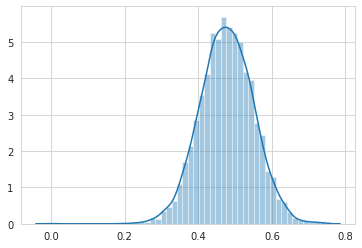

In [0]:
array_30 = np.empty(5000)
for i in range(4999):
  sample = breakout_score['score_1'].sample(30)
  mean = sample.mean()
  std = sample.std()
  score = 21500
  array_30[i] = 1-norm.cdf(score,mean,std)
sns.distplot(array_30)


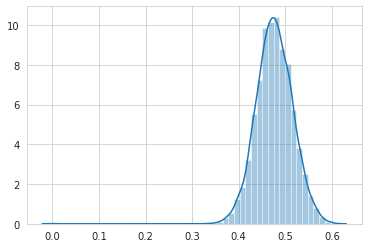

In [0]:
array_100 = np.empty(5000)
for i in range(4999):
  sample = breakout_score['score_1'].sample(100)
  mean = sample.mean()
  std = sample.std()
  score = 21500
  array_100[i] = 1-norm.cdf(score,mean,std)
sns.distplot(array_100)

The center of the distribution stays roughly the same while the spread of the distribution decreases.

### Confidence intervals

Let's say we want to know what the average performance of our player is. If we have access to data on an entire population, it is straighforward to answer questions like this. When we only have sample data, we can approximate the mean of our population using our sample mean. That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This can be captured by using a confidence interval.

In the online lecture, you have seen how to calculate a confidence interval for probilities. We can use a similar method to compute a confidence interval for numerical data. We can calculate a 95% confidence interval for a sample mean by adding and subtracting 1.96 standard errors to the point estimate (this is the z*–value). By computing confidence intervals, we can  make inferences about what the population mean. For numerical data, we can compute the standard error using the formula: SE = S/sqrt(n)


### <span style="color:red"> Question 5.1 </span>

Write a function that takes a sample dataset and a z*–value as input and that outputs the lower and the upper bound of the confidence interval.
(use google if you don't know yet how to write a function in Python)

In [0]:
import math
def sample(sample, z):
  n = sample.shape[0]
  mean = sample.mean()
  std = sample.std()
  SE = (std/(math.sqrt(n)))
  low_bound = mean - z*SE 
  upp_bound = mean + z*SE 
  print("The interval is: [" + str(low_bound)+", " + str(upp_bound)+"]")



### <span style="color:red"> Question 5.2 </span>

Draw a sample of 30 scores and print the confidence interval. Does the confidence interval contain the population mean?

In [0]:
sample(breakout_score['score_1'].sample(30), 1.96)

The interval is: [17887.162693626353, 21646.170639706983]


Yes, it does.

### <span style="color:red"> Question 5.3 </span>
Now recompute the confidence interval for a sample of 200 scores. How does the interval change? Why is that?


In [0]:

sample(breakout_score['score_1'].sample(200), 1.96)

The interval is: [20571.54946400411, 22051.45053599589]


It gets smaller. That is because with a bigger dataset you can be more sure that your data is representable of the entire population.

### <span style="color:red"> Question 5.4 </span>
Now change the confidence level to 99% (z*=2.58). How does that change your interval?

In [0]:
sample(breakout_score['score_1'].sample(30), 2.58)
sample(breakout_score['score_1'].sample(200), 2.58)

The interval is: [17208.839201145638, 21777.827465521026]
The interval is: [20058.06860629459, 21985.93139370541]


It is bigger, as it is harder to say the mean is in this interval with 99% certainty than it is with 95% certainty 

### <span style="color:red"> Question 5.5 </span>
Draw 5000 samples of 50 scores and count how often the 95% confidence interval contains the population mean. Is this number similar to what you would expect?

In [0]:
def confidence(sample, z):
  n = sample.shape[0]
  mean = sample.mean()
  std = sample.std()
  SE = (std/(math.sqrt(n)))
  low_bound = mean - z*SE 
  upp_bound = mean + z*SE 
  if pop_mean > low_bound and pop_mean<upp_bound:
    return 1
  else:
    return 0

x = 0
pop_mean = breakout_score['score_1'].mean()
for i in range(4999):
  x= x+confidence(breakout_score['score_1'].sample(50), 1.96)
print(x)  
print("This gives the percentage of succesfull intervals of: " + str((x/5000)*100) + "%")

4751
This gives the percentage of succesfull intervals of: 95.02000000000001%


The success percentage of this function shows that we are indeed looking at the 95% interval